# **EXECUTIVE SUMMARY**    
The objective of this project is to build a machine learning model that will predict taxicab trip fare before riding based on 2022 NYC Yellow Cab trip record data (https://data.cityofnewyork.us/Transportation/2022-Yellow-Taxi-Trip-Data/qp3b-zxtp).
To that end, I will demonstrate the phases of the data science pipeline:
1. **[Random Sampling](#sampl)** Make a Random Sample from the large original CSV file with (39.7 Milions rows & Size More than 3.5 GB) to make the analysis and modeling process more efficient: 
2. **[Preprocessing](#prep)**: Clean and transform the data into a usable format for analysis.
3. **[Exploratory Analysis](#eda)**: Perform exploratory analysis to identify the best features to be used for modeling.  And Test the Models Assumptions to choose suitable model for the data
4. **[Algorithm Development](#ml)**: Train, test, and refine various models to predict the target variable.  Given that our dependent variable `trip_duration` is a continuous outcome,  the regression algorithms to be protoyped are as follows:
 - [Multivarite Linear Regression](#linear)  


5. **[Model Deployment](#deployment)**: Apply the best performing model to the test set for contest submission.


# **ABOUT THE DATA**  
The  dataset is based on the 2022 NYC Yellow Cab trip record data. Its variables are as follows:

| **Variable Name** | **Description** | **Type**|          
| :------------------ |:-------------|:-------------|   
|vendor_id    | A code indicating the TPEP provider that provided the record.     | Number|
|pickup_datetime |  date and time when the meter was engaged|  Data & Time|
|dropoff_datetime|  date and time when the meter was disengaged|  Data & Time|
|passenger_count|  the number of passengers in the vehicle (driver entered value)|  Number|
|trip_distance |  The elapsed trip distance in miles reported by the taximeter.| Number|
|RatecodeID | The final rate code in effect at the end of the trip. | Number |
|PULocationID | TLC Taxi Zone in which the taximeter was engaged|  Number |
|DOLocationID  |   TLC Taxi Zone in which the taximeter was disengaged|  Number |
|store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip   | Plain-text|
|payment_type | A numeric code signifying how the passenger paid for the trip. | Number |
|fare_amount | 	The time-and-distance fare calculated by the meter. | Number |
|extra | Miscellaneous extras and surcharges. | Number |
|mta_tax | 	Tax that is automatically triggered based on the metered rate in use.| Number |
|tip_amount | This field is automatically populated for credit card tips. Cash tips are not included. | Number|
|tolls_amount | Total amount of all tolls paid in trip. | Number |
|improvement_surcharge | Improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. | Number |
|total_amount | The total amount charged to passengers. Does not include cash tips. | Number|
|congestion_surcharge | Total amount collected in trip for NYS congestion surcharge. | Number |
|airport_fee | For pick up only at LaGuardia and John F. Kennedy Airports. | Number |


## <a id="sampl"></a> **1.Random Sampling:**
- The original CSV file contain 3.97 milions record (more than 3.5 GB), So to make the Analysis and Modeling process more efficient we will get a random sample with (1 milion rocord) to work in it.

**I completed this step in (Random Sampling from Large CSV file.ipynb) notebook.**

## <a id="prep"></a>**2. DATA PRE-PROCESSING**
 First, the data will be loaded and cleaned into a usuable format for analysis. Specifically, I'll need to address:  
 - [Delete irrelevent coloumns](#delcol)
 - [data types](#types)
 - [missing data](#missing)
 - [outliers](#outliers)  
 - [feature engineering](#engineering)

In [87]:
import warnings
import datetime
warnings.filterwarnings("ignore")

# Import useful liberires 
import pandas as pd
import numpy as np

# Visualision Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load our DataFrame from The Sample Data

df0 = pd.read_csv('Random_Sample_2022_Yellow_Taxi_Trip_Data.csv')
df0.shape

(998859, 20)

Our Data has (~= 1 milion record) and 20 columns 

In [3]:
# Display the first 10 rows
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,2,01/01/2022 12:40:12 AM,01/01/2022 01:07:08 AM,1.0,5.43,1.0,N,68,263,1,21.0,0.5,0.5,4.00,0.0,0.3,28.80,2.5,0.0
1,1,1,01/01/2022 12:31:53 AM,01/01/2022 12:36:31 AM,0.0,1.30,1.0,N,140,229,1,6.0,3.0,0.5,2.90,0.0,0.3,12.70,2.5,0.0
2,2,2,01/01/2022 12:43:07 AM,01/01/2022 12:51:17 AM,1.0,1.86,1.0,N,239,237,1,8.5,0.5,0.5,2.46,0.0,0.3,14.76,2.5,0.0
3,3,2,01/01/2022 12:36:17 AM,01/01/2022 12:41:48 AM,2.0,1.30,1.0,N,249,90,1,6.0,0.5,0.5,0.00,0.0,0.3,9.80,2.5,0.0
4,4,2,01/01/2022 12:55:14 AM,01/01/2022 01:11:18 AM,1.0,4.58,1.0,N,161,24,1,16.0,0.5,0.5,3.96,0.0,0.3,23.76,2.5,0.0
5,5,2,01/01/2022 01:01:24 AM,01/01/2022 01:08:03 AM,6.0,1.30,1.0,N,74,262,2,7.0,0.5,0.5,0.00,0.0,0.3,10.80,2.5,0.0
6,6,2,01/01/2022 01:01:52 AM,01/01/2022 01:11:02 AM,2.0,2.36,1.0,N,237,107,1,9.0,0.5,0.5,3.84,0.0,0.3,16.64,2.5,0.0
7,7,2,01/01/2022 12:51:14 AM,01/01/2022 01:02:45 AM,1.0,2.22,1.0,N,236,141,1,10.5,0.5,0.5,3.58,0.0,0.3,17.88,2.5,0.0
8,8,2,01/01/2022 12:55:56 AM,01/01/2022 01:17:11 AM,1.0,9.03,1.0,N,170,243,2,28.0,0.5,0.5,0.00,0.0,0.3,31.80,2.5,0.0
9,9,2,01/01/2022 12:53:34 AM,01/01/2022 12:55:13 AM,1.0,0.64,1.0,N,263,263,1,4.0,0.5,0.5,1.56,0.0,0.3,9.36,2.5,0.0


Every Row repressents a single trip.

### 2.a <a id='delcol'></a> **Delete Irrelevent columns:**
Our objective is to predict fare amount of trip before riding, So maybe there are some columns irrelevent to our objective, so we will drop it to simplify and increase efficency of our analysis and modeling.

- First we will drop "Unnamed:0" because it's like the index of records.
- Secondaly we will drop ("extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge"), Because they are addational amount based in some laws, and doesn't affect the fare amount, but they are added to it, to form the total amount.

In [4]:
df0.drop(columns=["Unnamed: 0","extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge"], axis=1, inplace= True)
df0.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,airport_fee
0,2,01/01/2022 12:40:12 AM,01/01/2022 01:07:08 AM,1.0,5.43,1.0,N,68,263,1,21.0,0.0
1,1,01/01/2022 12:31:53 AM,01/01/2022 12:36:31 AM,0.0,1.30,1.0,N,140,229,1,6.0,0.0
2,2,01/01/2022 12:43:07 AM,01/01/2022 12:51:17 AM,1.0,1.86,1.0,N,239,237,1,8.5,0.0
3,2,01/01/2022 12:36:17 AM,01/01/2022 12:41:48 AM,2.0,1.30,1.0,N,249,90,1,6.0,0.0
4,2,01/01/2022 12:55:14 AM,01/01/2022 01:11:18 AM,1.0,4.58,1.0,N,161,24,1,16.0,0.0


### 2.b <a id='types'></a> **Data Types:**
Here we will check the data types of features values, and transform to another data types for another data type if needed.

In [5]:
# check columns data types:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998859 entries, 0 to 998858
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               998859 non-null  int64  
 1   tpep_pickup_datetime   998859 non-null  object 
 2   tpep_dropoff_datetime  998859 non-null  object 
 3   passenger_count        964497 non-null  float64
 4   trip_distance          998859 non-null  float64
 5   RatecodeID             964497 non-null  float64
 6   store_and_fwd_flag     964497 non-null  object 
 7   PULocationID           998859 non-null  int64  
 8   DOLocationID           998859 non-null  int64  
 9   payment_type           998859 non-null  int64  
 10  fare_amount            998859 non-null  float64
 11  airport_fee            964497 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 91.4+ MB


After reading data documentation, We can classify features as quantative and qualitative features:
1. Quantative features:
 - tpep_pickup_datetime.
 - tpep_dropoff_datetime.
 - passenger_count.
 - trip_distance.
 - fare amount.
2. Qualitative features:
 - VendorID.
 - RateCodeID.
 - store_and_fwd_flag.
 - PULocationID.
 - DOLocationID.
 - payment_type.

Firstly, We will convert qualitative columns datatype to categorical data.

In [6]:
df0['VendorID'] = df0['VendorID'].astype('category')
df0['RatecodeID'] = df0['RatecodeID'].astype('category')
df0['store_and_fwd_flag'] = df0['store_and_fwd_flag'].astype('category')
df0['PULocationID'] = df0['PULocationID'].astype('category')
df0['DOLocationID'] = df0['DOLocationID'].astype('category')
df0['payment_type'] = df0['payment_type'].astype('category')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998859 entries, 0 to 998858
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   VendorID               998859 non-null  category
 1   tpep_pickup_datetime   998859 non-null  object  
 2   tpep_dropoff_datetime  998859 non-null  object  
 3   passenger_count        964497 non-null  float64 
 4   trip_distance          998859 non-null  float64 
 5   RatecodeID             964497 non-null  category
 6   store_and_fwd_flag     964497 non-null  category
 7   PULocationID           998859 non-null  category
 8   DOLocationID           998859 non-null  category
 9   payment_type           998859 non-null  category
 10  fare_amount            998859 non-null  float64 
 11  airport_fee            964497 non-null  float64 
dtypes: category(6), float64(4), object(2)
memory usage: 53.4+ MB


Secondly, Convert (tpep_pickup_datetime, tpep_dropoff_datetime) from object to datetime datatype.

In [12]:
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998859 entries, 0 to 998858
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               998859 non-null  category      
 1   tpep_pickup_datetime   998859 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  998859 non-null  datetime64[ns]
 3   passenger_count        964497 non-null  float64       
 4   trip_distance          998859 non-null  float64       
 5   RatecodeID             964497 non-null  category      
 6   store_and_fwd_flag     964497 non-null  category      
 7   PULocationID           998859 non-null  category      
 8   DOLocationID           998859 non-null  category      
 9   payment_type           998859 non-null  category      
 10  fare_amount            998859 non-null  float64       
 11  airport_fee            964497 non-null  float64       
dtypes: category(6), datetime64[ns](2), float64(4

### 2.c <a id='missing'></a> **Missing Data:**

In [8]:
# Number of missing values in each column
df0.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          34362
trip_distance                0
RatecodeID               34362
store_and_fwd_flag       34362
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
airport_fee              34362
dtype: int64

In [9]:
# Number of rows have missing value/s
df0.isna().any(axis=1).sum()

34362

In [10]:
# Percentage of rows have missing value/s
print('Percentage of rows with missing value/s:',(df0.isna().any(axis=1).sum()/df0.shape[0])*100,'%')

Percentage of rows with missing value/s: 3.440125182833613 %


We have 34362 rows (3.44% of the total rows in Dataset) with missing values in (passenger_count, RatecodeID, store_and_fwd_flag, airport_fee) columns.

In [11]:
# Investigating rows with missing values:
mask = df0.isna().any(axis=1)
df_missing = df0[mask]
df_missing.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,airport_fee
60265,2,2022-01-01 00:50:00,2022-01-01 00:54:00,NaN,1.00,NaN,NaN,68,246,0,13.20,NaN
60266,2,2022-01-01 00:57:00,2022-01-01 01:37:00,NaN,14.94,NaN,NaN,238,257,0,47.13,NaN
60267,2,2022-01-01 00:13:00,2022-01-01 00:14:00,NaN,0.28,NaN,NaN,145,145,0,13.54,NaN
60268,2,2022-01-01 00:42:00,2022-01-01 00:51:00,NaN,1.54,NaN,NaN,142,50,0,13.20,NaN
60269,2,2022-01-01 01:22:41,2022-01-01 01:39:27,NaN,4.18,NaN,NaN,107,263,0,13.20,NaN


In [14]:
df_missing.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,airport_fee
998854,2,2022-12-31 22:01:17,2022-12-31 22:19:28,NaN,5.50,NaN,NaN,234,263,0,30.47,NaN
998855,2,2022-12-31 22:55:02,2022-12-31 23:13:59,NaN,1.82,NaN,NaN,68,68,0,14.96,NaN
998856,2,2022-12-31 22:47:58,2022-12-31 22:48:57,NaN,0.00,NaN,NaN,42,42,0,-66.86,NaN
998857,1,2022-12-31 22:12:24,2022-12-31 22:24:10,NaN,0.00,NaN,NaN,140,43,0,25.30,NaN
998858,2,2022-12-31 23:02:54,2022-12-31 23:30:21,NaN,7.29,NaN,NaN,197,189,0,40.50,NaN


<AxesSubplot:xlabel='tpep_pickup_datetime', ylabel='percentage'>

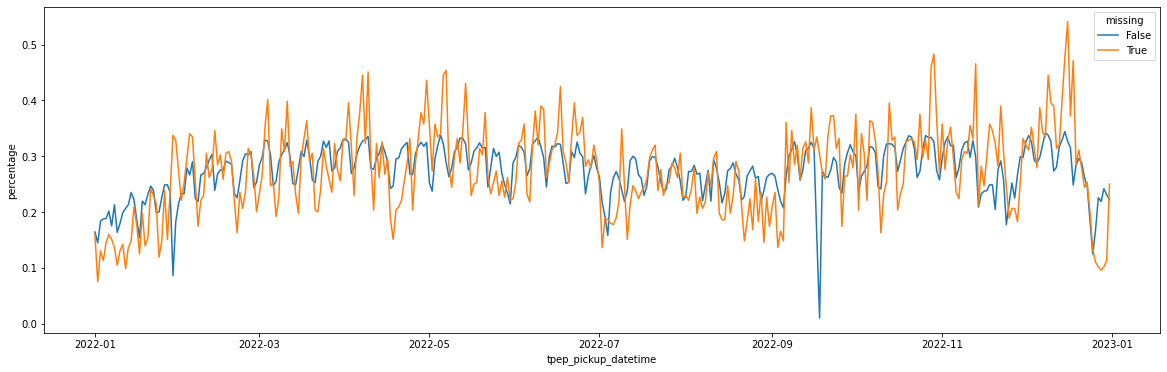

In [90]:
plt.figure(figsize=(20,6))
df_date_missing = df_missing[['tpep_pickup_datetime','VendorID']]
df_date_missing['tpep_pickup_datetime'] = df_date_missing['tpep_pickup_datetime'].dt.date
df_date_missing = df_date_missing.groupby('tpep_pickup_datetime').count().reset_index().rename(columns={'VendorID':'trip_count'})
df_date_missing['percentage'] = (df_date_missing['trip_count']/df_missing.shape[0])*100
df_date_missing['missing'] = True
df_date = df0[['tpep_pickup_datetime','VendorID']]
df_date['tpep_pickup_datetime'] = df_date['tpep_pickup_datetime'].dt.date
df_date = df_date.groupby('tpep_pickup_datetime').count().reset_index().rename(columns={'VendorID':'trip_count'})
df_date['percentage'] = (df_date['trip_count']/df0.shape[0])*100
df_date['missing'] = False
df_date_combine = pd.concat([df_date_missing, df_date]).reset_index()
df_date_combine = df_date_combine[df_date_combine['tpep_pickup_datetime']>=datetime.date(2022,1,1)].sort_values(by='tpep_pickup_datetime').reset_index()
sns.lineplot(data = df_date_combine, x='tpep_pickup_datetime', y='percentage', hue='missing')

<AxesSubplot:xlabel='VendorID', ylabel='percentage'>

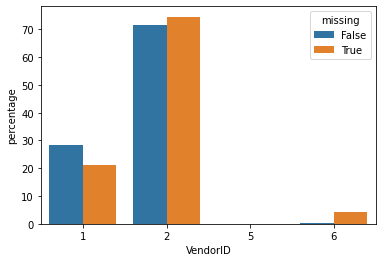

In [112]:
df_vendor_missing = df_missing[['VendorID','trip_distance']].groupby('VendorID').count().reset_index().rename(columns={'trip_distance':'count'})
df_vendor_missing['percentage'] = (df_vendor_missing['count']/df_missing.shape[0])*100
df_vendor_missing['missing'] = True
df_vendor = df0[['VendorID','trip_distance']].groupby('VendorID').count().reset_index().rename(columns={'trip_distance':'count'})
df_vendor['percentage'] = (df_vendor['count']/df0.shape[0])*100
df_vendor['missing'] = False
df_vendor_combine = pd.concat([df_vendor_missing, df_vendor]).reset_index()
sns.barplot(data=df_vendor_combine, x='VendorID', y='percentage', hue='missing')

In [24]:
(df_missing['payment_type'].value_counts()/df_missing.shape[0])*100

0    100.0
1      0.0
2      0.0
3      0.0
4      0.0
Name: payment_type, dtype: float64

In [25]:
(df0['payment_type'].value_counts()/df0.shape[0])*100

1    75.879679
2    19.576036
0     3.440125
4     0.616503
3     0.487656
Name: payment_type, dtype: float64

<AxesSubplot:>

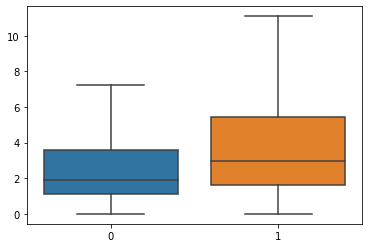

In [33]:
sns.boxplot(data=[df0['trip_distance'],df_missing['trip_distance']], showfliers=False)

<AxesSubplot:>

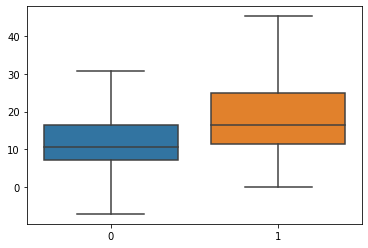

In [34]:
sns.boxplot(data=[df0['fare_amount'],df_missing['fare_amount']], showfliers=False)

Because the records have missing values is not a large percentage of our dataset (3.44%), and the records have missing values in 4 columns, So I will drop this records from our dataset.

In [ ]:
df = df0.dropna()
df.head()

In [ ]:
# Checking if their any missing values yet.
df.info()

Now our dataset hasn't any missing values.

### 2.d <a id='outliers'></a> **Outliers:**